# Goal

Here we develop a 2-dimensional latin-hypercube design using the [pyDOE](https://pythonhosted.org/pyDOE/randomized.html) package. In particular, the design is developed to span the prior range of the model parameter values in the ensemble training simulations. The LHC design will be used to sample the emulator to find model parameter posteriors. Beyond the range of the training data ( CREVLIQ={0,195}, CLIFVMAX={0,13} ), the emulator variance is unconstrained and relatively large as the GP model reverts to the prior variance.

The 10000-sample 2D design is created with the assumption that the samples "maximize the minimum distance between points, but place the point in a randomized location within its interval", using the maximin criterion in pyDOE's "lhs" module.

# Setup

In [1]:
# import packages that are needed to create the LHC design
import numpy as np
import matplotlib.pyplot as plt
import pickle
from datetime import datetime
# # import the latin hypercube code ("lhs" module)
from pyDOE import *
# define the save path for our plots
save_path='./figures/'
# set the default grid style
plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5

# Load Data

We draw in the parameter range of the ensemble simulations used to train our emulator.

In [2]:
# define the data location
dat_path='./data/lig_data_dec18.pk1'
# load dictionary containing the data
dat=pickle.load( open( dat_path, "rb" ) )
# define parameter value grids
crevliq=dat['crevliq']
clifvmax=dat['clifvmax']

# Latin-Hypercube Design

### Create the design

We develop the latin-hypercube design. By default the "lhs" module from pyDOE creates a design over the uniform distirbution between 0 and 1.0 which may be scaled to fit the specific purpose/use-case of the sampling. In our particular methodology, the axes of GP emulators are first normalized to between 0 and 1.0, enabling us to use the LHC design to sample from them directly without scaling.

In [3]:
# create an object to time the design creation
startTime = datetime.now()

# for reproducability, fix the random seed
np.random.seed(2)

# choose the number of parameters/dimensions
n=2
# choose how many samples we want
n_samples=10000
# develop a design to sample the space given the number of samples.
# Note that this is uniform following our emulators convention of being normalized to 1.0
lhd=lhs(n, samples=n_samples,criterion='maximin')

# print the elapsed time to create the design
print(datetime.now() - startTime)

0:33:30.639634


### Visualize the design

To visualize the design we created on the original axes of the ensemble training simulations, we need to "denormalize" the axes. Then we will plot.

In [4]:
# convert to parameter space to visualize
from lig_utilities import denormalize
lhd_x=denormalize(lhd[:,1],np.max(clifvmax),np.min(clifvmax))
lhd_y=denormalize(lhd[:,0],np.max(crevliq),np.min(crevliq))

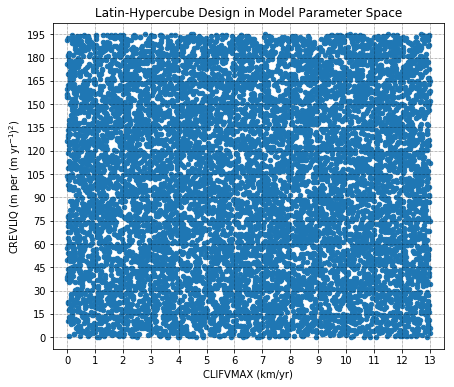

In [5]:
# plot the result
lhc_fig=plt.figure(figsize=(7,6))
plt.scatter(lhd_x,lhd_y,s=20,edgecolors='face')
plt.xticks(clifvmax)
plt.yticks(crevliq)
plt.xlim([-0.5,13.5])
plt.ylim([-7.5,202.5])
plt.title('Latin-Hypercube Design in Model Parameter Space')
plt.xlabel('CLIFVMAX (km/yr)')
plt.ylabel('CREVLIQ (m per (m yr$^{−1}$)$^{2}$)')
plt.grid()
plt.show()

# Save the LHC Design

In [6]:
# save the result
pickle.dump(lhd, open( "./models/lig_lhc_design_10000.pk1", "wb" ) )